<a href="https://colab.research.google.com/github/dckeisy/projectIII_dataMin/blob/google_colab/projectIII_DataMin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Carga y comprensión inicial de los datos**

Clonar repositorio

In [70]:
! git clone https://github.com/dckeisy/projectIII_dataMin.git

fatal: destination path 'projectIII_dataMin' already exists and is not an empty directory.


Importar librería para trabajar los datos del repositorio

In [49]:
import pandas as pd

Leer datos

In [50]:
data = pd.read_csv("/content/projectIII_dataMin/datos.csv")

Comprender el dataset

In [51]:
print("Primeras filas del dataset:")
print(data.head())
print("\nTipos de datos por columna:")
print(data.dtypes)
print("\nTamaño del dataset:")
print(f"Filas: {data.shape[0]}, Columnas: {data.shape[1]}")

Primeras filas del dataset:
  churn  accountlength internationalplan voicemailplan  numbervmailmessages  \
0    No            128                no           yes                   25   
1    No            107                no           yes                   26   
2    No            137                no            no                    0   
3    No             84               yes            no                    0   
4    No             75               yes            no                    0   

   totaldayminutes  totaldaycalls  totaldaycharge  totaleveminutes  \
0            265.1            110           45.07            197.4   
1            161.6            123           27.47            195.5   
2            243.4            114           41.38            121.2   
3            299.4             71           50.90             61.9   
4            166.7            113           28.34            148.3   

   totalevecalls  totalevecharge  totalnightminutes  totalnightcalls  \
0   

# **Limpiar y preparar los datos**

Identificar valores nulos

In [52]:
print("Valores nulos por columna:")
print(data.isnull().sum())

Valores nulos por columna:
churn                         0
accountlength                 0
internationalplan             0
voicemailplan                 0
numbervmailmessages           0
totaldayminutes               0
totaldaycalls                 0
totaldaycharge                0
totaleveminutes               0
totalevecalls                 0
totalevecharge                0
totalnightminutes             0
totalnightcalls               0
totalnightcharge              0
totalintlminutes              0
totalintlcalls                0
totalintlcharge               0
numbercustomerservicecalls    0
dtype: int64


Tratar valores nulos (ejemplo: llenar con media o eliminar filas)

In [53]:
for columna in data.columns:
    nulos = data[columna].isnull().sum()
    if nulos > 0:
        print(f"Valores nulos en la columna '{columna}': {nulos}")
        if data[columna].dtype in ['float64','int64']:
            mediana = data[columna].median()
            data[columna] = data[columna].fillna(mediana)
            print(f"  - Rellenados con la mediana: {mediana}")
        else:
            media = data[columna].mode()[0]
            data[columna] = data[columna].fillna(media)
            print(f"  - Rellenados con la moda: {media}")

# Eliminar duplicados valores duplicados
data.drop_duplicates(inplace=True)

Revisar y convertir tipos de datos si es necesario

In [ ]:
# data['columna_a_convertir'] = data['columna_a_convertir'].astype('tipo_deseado')

Renombrar columnas

In [54]:
data.rename(columns={
    "churn": "CustomerChurn",
    "accountlength": "AccountLength",
    "internationalplan": "HasInternationalPlan",
    "voicemailplan": "HasVoicemailPlan",
    "numbervmailmessages": "VoicemailMessageCount",
    "totaldayminutes": "DayMinutes",
    "totaldaycalls": "DayCalls",
    "totaldaycharge": "DayCharges",
    "totaleveminutes": "EveningMinutes",
    "totalevecalls": "EveningCalls",
    "totalevecharge": "EveningCharges",
    "totalnightminutes": "NightMinutes",
    "totalnightcalls": "NightCalls",
    "totalnightcharge": "NightCharges",
    "totalintlminutes": "InternationalMinutes",
    "totalintlcalls": "InternationalCalls",
    "totalintlcharge": "InternationalCharges",
    "numbercustomerservicecalls": "CustomerServiceCalls"
}, inplace=True)


Tratar variables categóricas

In [55]:
data['CustomerChurn'] = data['CustomerChurn'].astype(str).str.lower().map({'no': 0, 'yes': 1})
data['HasInternationalPlan'] = data['HasInternationalPlan'].astype(str).str.lower().map({'no': 0, 'yes': 1})
data['HasVoicemailPlan'] = data['HasVoicemailPlan'].astype(str).str.lower().map({'no': 0, 'yes': 1})

Revisar el cambio de las variables categóricas

In [57]:
print(data.head(12))

    CustomerChurn  AccountLength  HasInternationalPlan  HasVoicemailPlan  \
0               0            128                     0                 1   
1               0            107                     0                 1   
2               0            137                     0                 0   
3               0             84                     1                 0   
4               0             75                     1                 0   
5               0            118                     1                 0   
6               0            121                     0                 1   
7               0            147                     1                 0   
8               0            117                     0                 0   
9               0            141                     1                 1   
10              1             65                     0                 0   
11              0             74                     0                 0   

    Voicema

# **Análisis univariado**

Estadísticas descriptivas

In [59]:
print("Estadísticas descriptivas:")
print(data.describe())

Estadísticas descriptivas:
       CustomerChurn  AccountLength  HasInternationalPlan  HasVoicemailPlan  \
count    5000.000000     5000.00000           5000.000000       5000.000000   
mean        0.141400      100.25860              0.094600          0.264600   
std         0.348469       39.69456              0.292691          0.441164   
min         0.000000        1.00000              0.000000          0.000000   
25%         0.000000       73.00000              0.000000          0.000000   
50%         0.000000      100.00000              0.000000          0.000000   
75%         0.000000      127.00000              0.000000          1.000000   
max         1.000000      243.00000              1.000000          1.000000   

       VoicemailMessageCount   DayMinutes     DayCalls   DayCharges  \
count            5000.000000  5000.000000  5000.000000  5000.000000   
mean                7.755200   180.288900   100.029400    30.649668   
std                13.546393    53.894699    19.

## Visualizaciones

Librerías

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Histogramas


Variables Numéricas:

Estadísticas descriptivas para CustomerChurn:
count    5000.000000
mean        0.141400
std         0.348469
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: CustomerChurn, dtype: float64


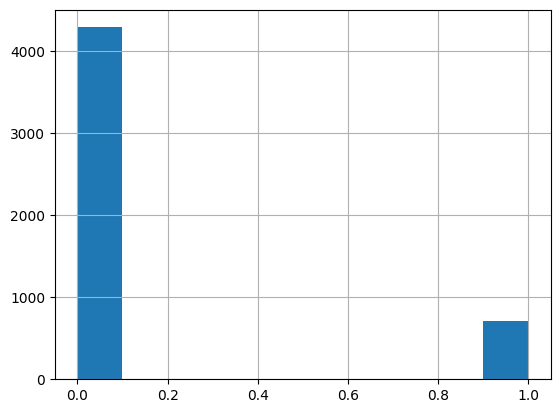


Estadísticas descriptivas para AccountLength:
count    5000.00000
mean      100.25860
std        39.69456
min         1.00000
25%        73.00000
50%       100.00000
75%       127.00000
max       243.00000
Name: AccountLength, dtype: float64


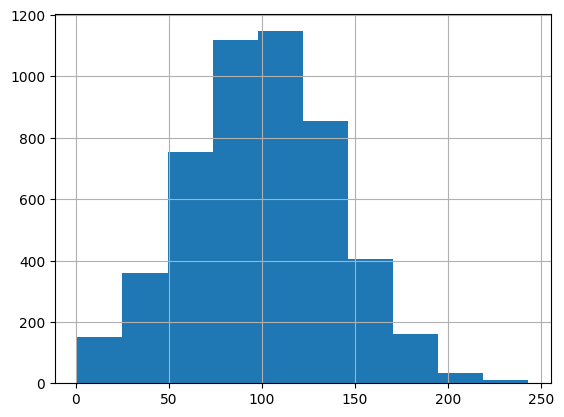


Estadísticas descriptivas para HasInternationalPlan:
count    5000.000000
mean        0.094600
std         0.292691
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: HasInternationalPlan, dtype: float64


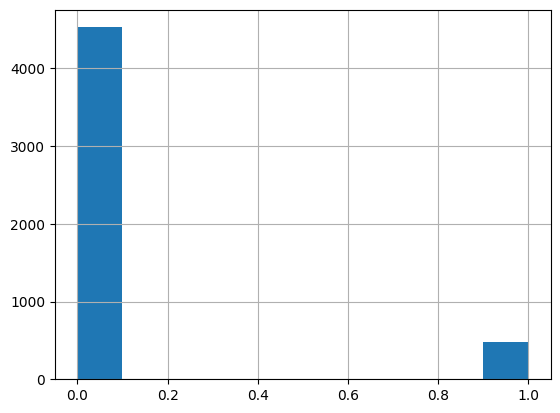


Estadísticas descriptivas para HasVoicemailPlan:
count    5000.000000
mean        0.264600
std         0.441164
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: HasVoicemailPlan, dtype: float64


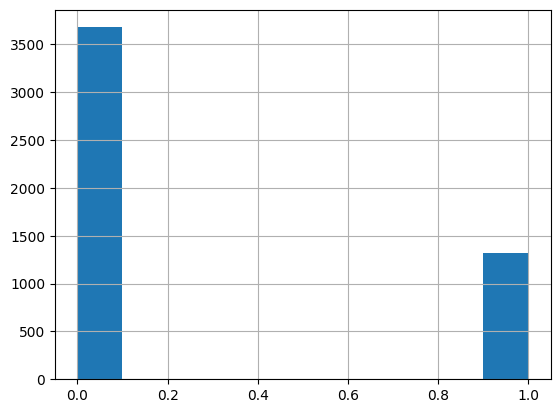


Estadísticas descriptivas para VoicemailMessageCount:
count    5000.000000
mean        7.755200
std        13.546393
min         0.000000
25%         0.000000
50%         0.000000
75%        17.000000
max        52.000000
Name: VoicemailMessageCount, dtype: float64


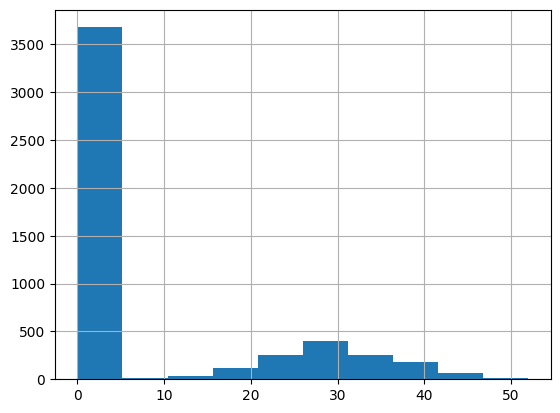


Estadísticas descriptivas para DayMinutes:
count    5000.000000
mean      180.288900
std        53.894699
min         0.000000
25%       143.700000
50%       180.100000
75%       216.200000
max       351.500000
Name: DayMinutes, dtype: float64


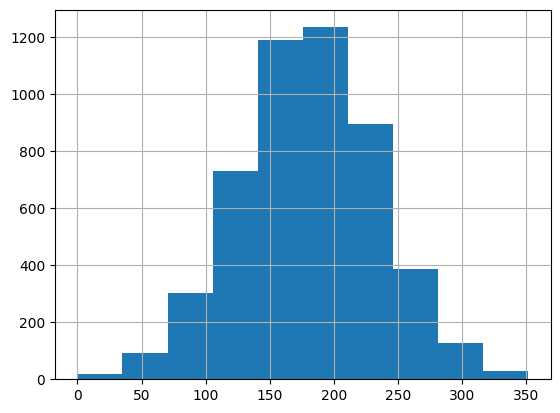


Estadísticas descriptivas para DayCalls:
count    5000.000000
mean      100.029400
std        19.831197
min         0.000000
25%        87.000000
50%       100.000000
75%       113.000000
max       165.000000
Name: DayCalls, dtype: float64


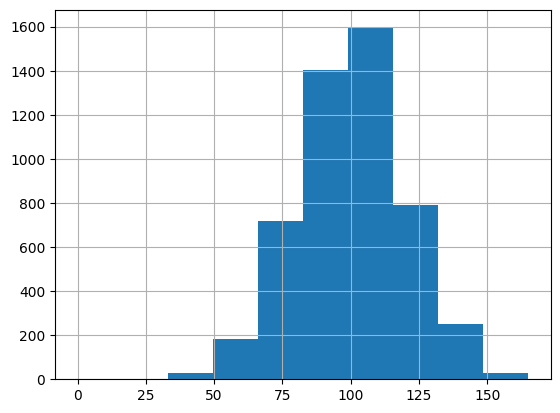


Estadísticas descriptivas para DayCharges:
count    5000.000000
mean       30.649668
std         9.162069
min         0.000000
25%        24.430000
50%        30.620000
75%        36.750000
max        59.760000
Name: DayCharges, dtype: float64


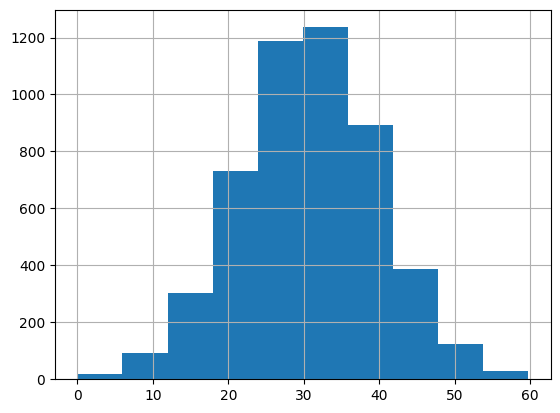


Estadísticas descriptivas para EveningMinutes:
count    5000.000000
mean      200.636560
std        50.551309
min         0.000000
25%       166.375000
50%       201.000000
75%       234.100000
max       363.700000
Name: EveningMinutes, dtype: float64


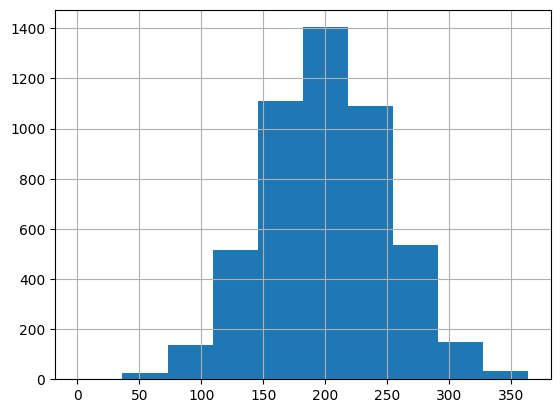


Estadísticas descriptivas para EveningCalls:
count    5000.000000
mean      100.191000
std        19.826496
min         0.000000
25%        87.000000
50%       100.000000
75%       114.000000
max       170.000000
Name: EveningCalls, dtype: float64


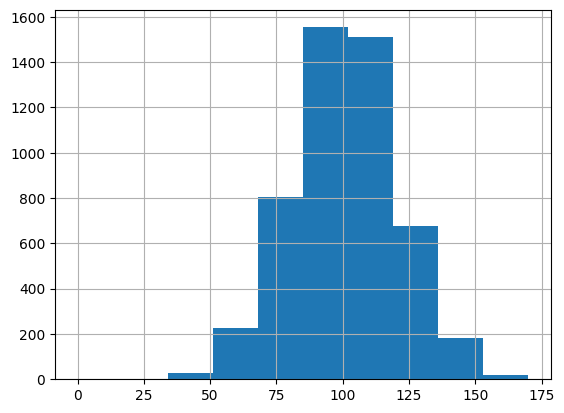


Estadísticas descriptivas para EveningCharges:
count    5000.000000
mean       17.054322
std         4.296843
min         0.000000
25%        14.140000
50%        17.090000
75%        19.900000
max        30.910000
Name: EveningCharges, dtype: float64


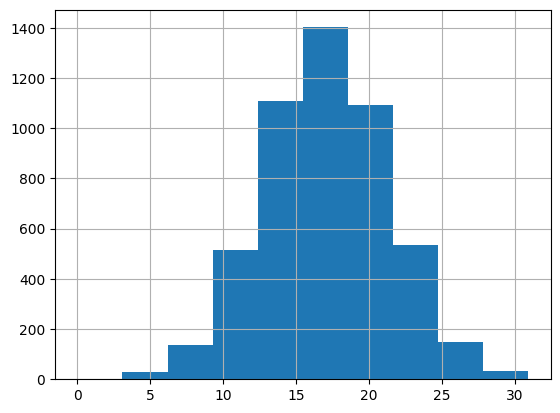


Estadísticas descriptivas para NightMinutes:
count    5000.000000
mean      200.391620
std        50.527789
min         0.000000
25%       166.900000
50%       200.400000
75%       234.700000
max       395.000000
Name: NightMinutes, dtype: float64


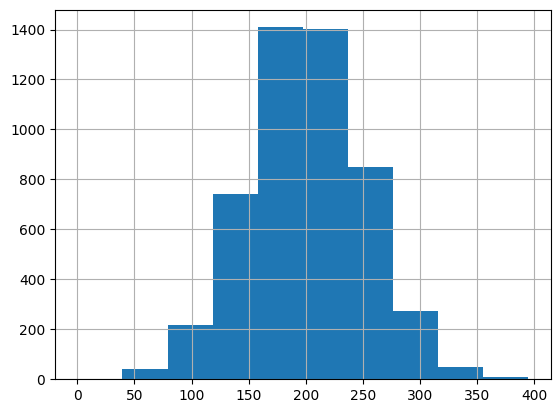


Estadísticas descriptivas para NightCalls:
count    5000.000000
mean       99.919200
std        19.958686
min         0.000000
25%        87.000000
50%       100.000000
75%       113.000000
max       175.000000
Name: NightCalls, dtype: float64


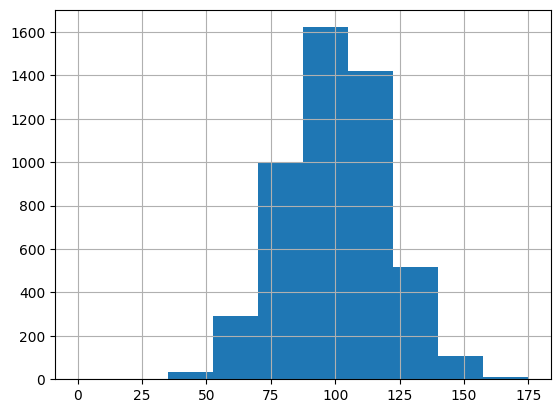


Estadísticas descriptivas para NightCharges:
count    5000.000000
mean        9.017732
std         2.273763
min         0.000000
25%         7.510000
50%         9.020000
75%        10.560000
max        17.770000
Name: NightCharges, dtype: float64


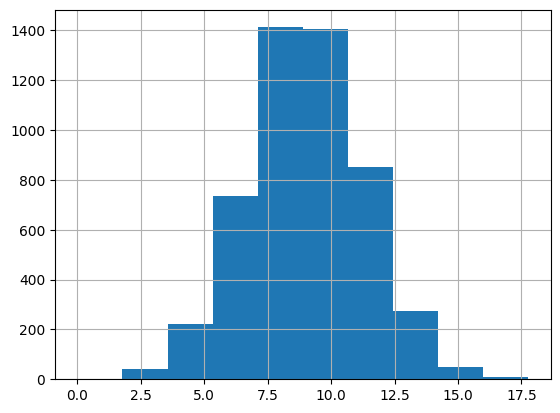


Estadísticas descriptivas para InternationalMinutes:
count    5000.000000
mean       10.261780
std         2.761396
min         0.000000
25%         8.500000
50%        10.300000
75%        12.000000
max        20.000000
Name: InternationalMinutes, dtype: float64


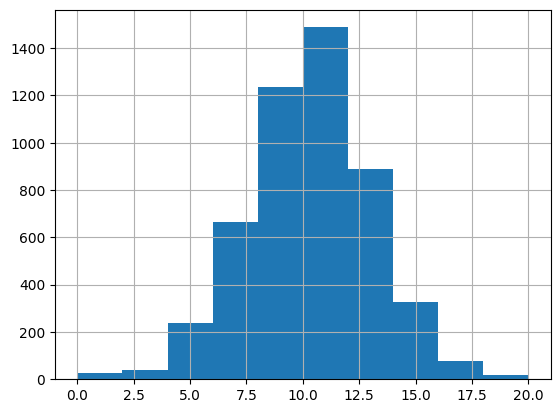


Estadísticas descriptivas para InternationalCalls:
count    5000.000000
mean        4.435200
std         2.456788
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max        20.000000
Name: InternationalCalls, dtype: float64


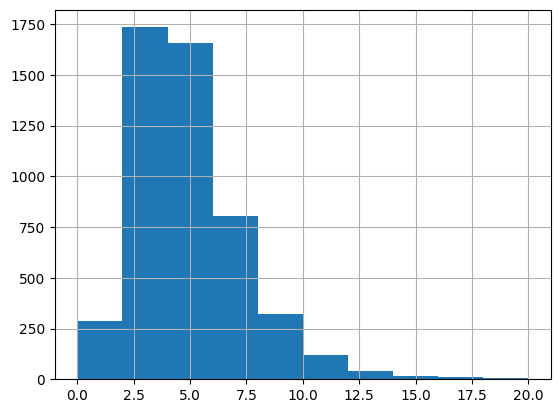


Estadísticas descriptivas para InternationalCharges:
count    5000.000000
mean        2.771196
std         0.745514
min         0.000000
25%         2.300000
50%         2.780000
75%         3.240000
max         5.400000
Name: InternationalCharges, dtype: float64


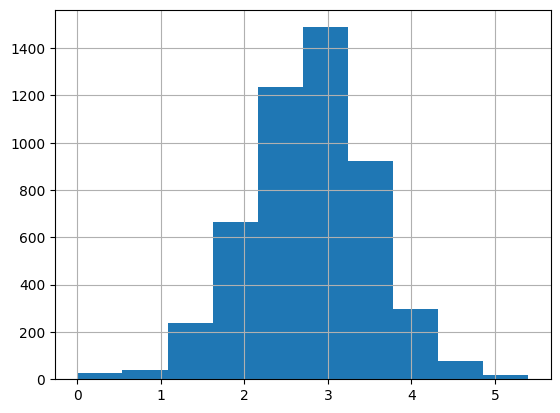


Estadísticas descriptivas para CustomerServiceCalls:
count    5000.000000
mean        1.570400
std         1.306363
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: CustomerServiceCalls, dtype: float64


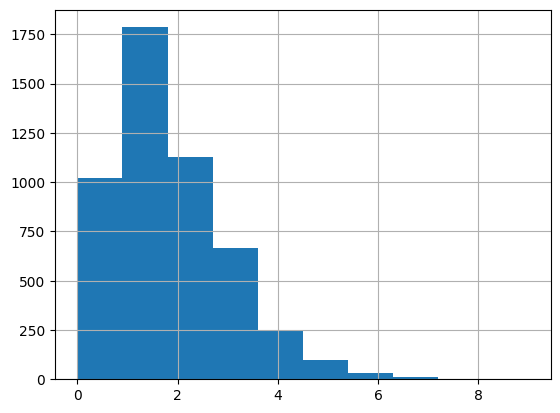

In [69]:
numerical_cols = data.select_dtypes(include=[np.number]).columns
if len(numerical_cols) > 0:
        print("\nVariables Numéricas:")
        for col in numerical_cols:
            print(f"\nEstadísticas descriptivas para {col}:")
            stats = data[col].describe()
            print(stats)
            data[col].hist()
            plt.show()

Comprobación de asimetría y normalidad